In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [44]:
df = pd.read_csv('..\Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [8]:
df.shape

(7043, 21)

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
df_copy = df.copy()

In [46]:
df_copy.shape

(7043, 21)

In [47]:
df = df[df['TotalCharges'] != " "]
df['TotalCharges'] = pd.to_numeric(df['TotalCharges']) 

In [48]:
df.shape

(7032, 21)

In [50]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [51]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [52]:
cat = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']
num = [ 'tenure','MonthlyCharges', 'TotalCharges']


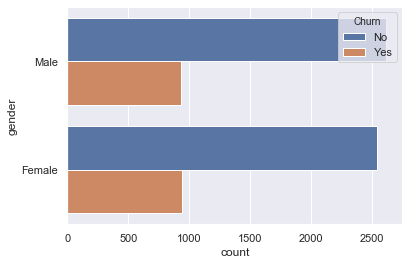

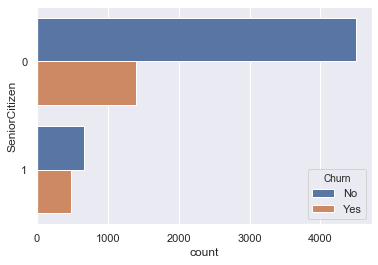

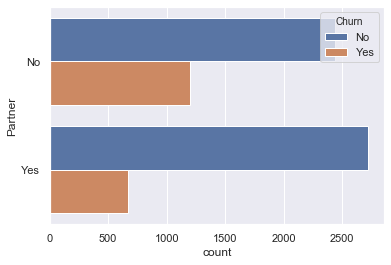

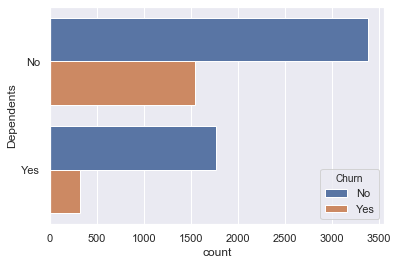

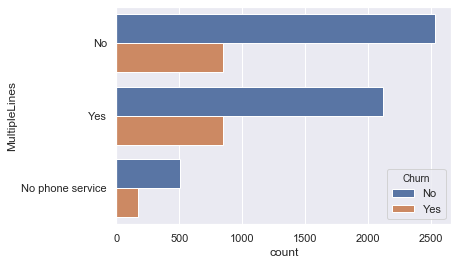

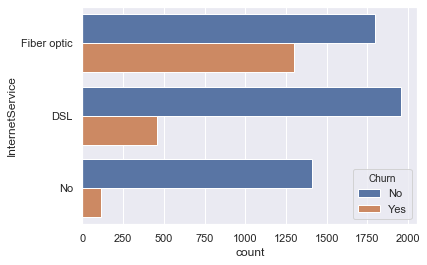

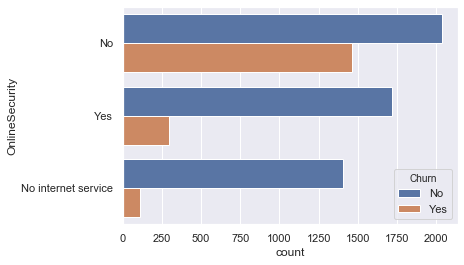

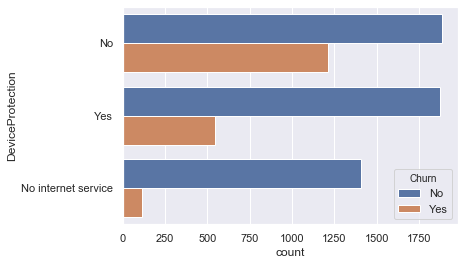

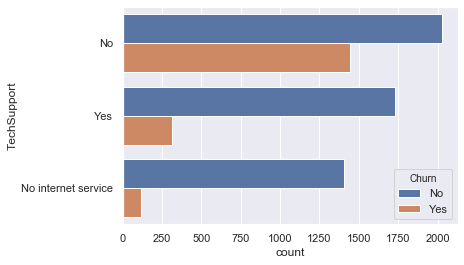

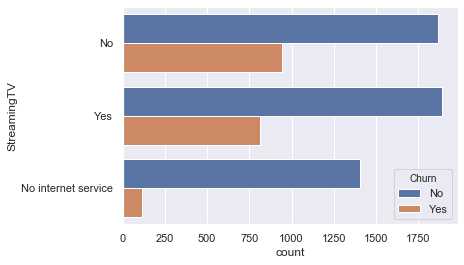

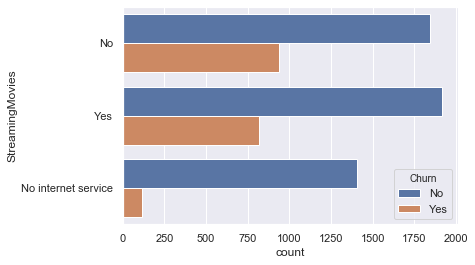

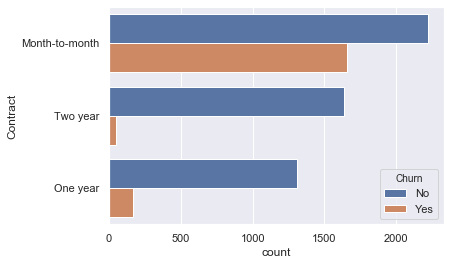

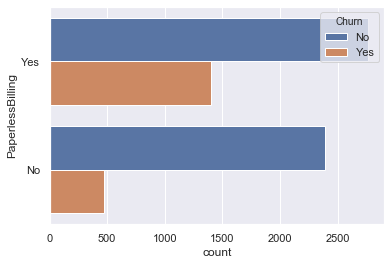

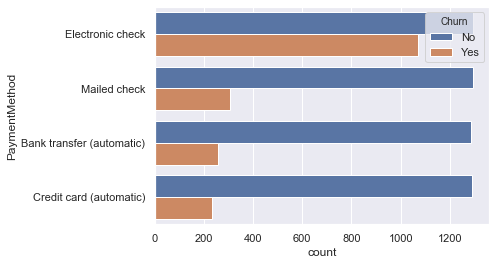

In [68]:
for col in cat:
    sns.countplot(y=col, data=df,order=df[col].value_counts().index, hue='Churn')
    plt.show()

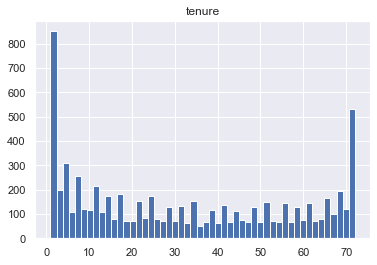

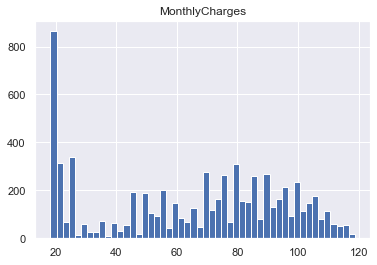

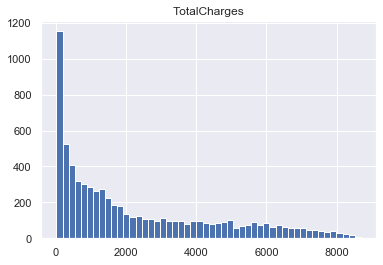

In [54]:
for col in num:
    df[col].hist(bins=50)
    plt.title(col)
    plt.show()

In [55]:
df[num].describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

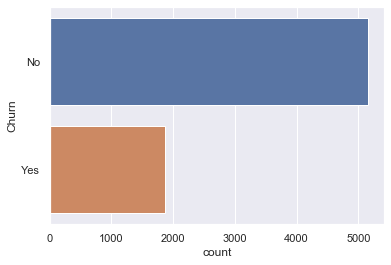

In [57]:
sns.countplot(y='Churn', data=df,order=df['Churn'].value_counts().index)

In [61]:
dfx = df[num + ['Churn']]

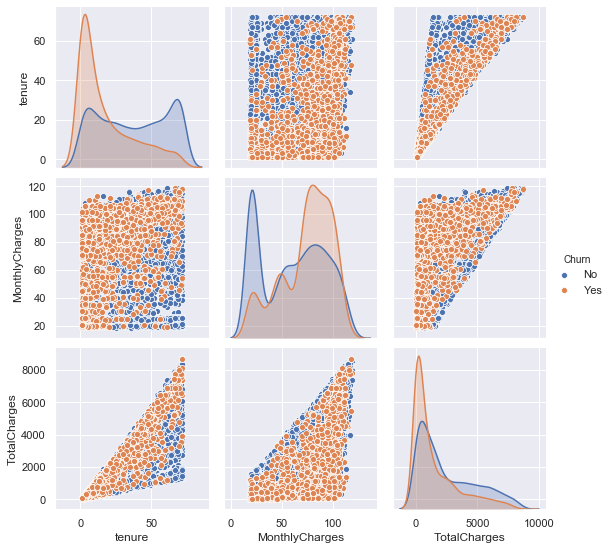

In [62]:
sns.pairplot(data=dfx, hue='Churn')

In [66]:
dfy = df[cat+num+['Churn']]

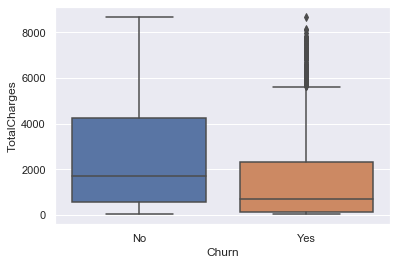

In [67]:
sns.boxplot(x='Churn', y = 'TotalCharges', data=dfy)

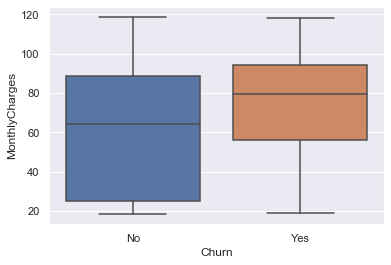

In [69]:
sns.boxplot(x='Churn', y = 'MonthlyCharges', data=dfy)


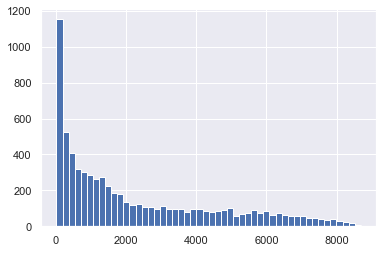

In [71]:
df['TotalCharges'].hist(bins=50)

In [87]:
df_features = df.drop(['customerID','Churn'], axis=1)
df_features.shape

(7032, 19)

In [88]:
df_features_dummies = pd.get_dummies(df_features, columns=cat, drop_first=True)
df_features_dummies.head()

tenure  MonthlyCharges  TotalCharges  gender_Male  SeniorCitizen_1  \
0       1           29.85         29.85            0                0   
1      34           56.95       1889.50            1                0   
2       2           53.85        108.15            1                0   
3      45           42.30       1840.75            1                0   
4       2           70.70        151.65            0                0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            1               0                 0   
1            0               0                 1   
2            0               0                 1   
3            0               0                 0   
4            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                               1                  0  ...   
1                               0                  0  ...   
2                               0                  0  ...   
3                               1                  0  ...   
4                               0                  0  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                  0                  0                     1   
1                  1                  0                     0   
2                  0                  0                     1   
3                  1                  0                     0   
4                  0                  0                     1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 30 columns]

In [89]:
from sklearn.model_selection import train_test_split
X = df_features_dummies.values
y = df['Churn'].map({"Yes": 1, "No": 0}).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scaling

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.57%
[[1363  150]
 [ 281  316]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1513
           1       0.68      0.53      0.59       597

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



# Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
score = model.score(X_test_scaled, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.67%
[[1386  127]
 [ 302  295]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1513
           1       0.70      0.49      0.58       597

    accuracy                           0.80      2110
   macro avg       0.76      0.71      0.72      2110
weighted avg       0.79      0.80      0.78      2110



# DNN model

In [111]:
from sklearn.model_selection import train_test_split
X = df_features_dummies.values
y = df['Churn'].map({"Yes": 1, "No": 0}).values
X_train0, X_test, y_train0, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train0, y_train0, test_size = 0.25)

In [112]:
print(X_train.shape, X_validation.shape, X_test.shape)

(4218, 30) (1407, 30) (1407, 30)


In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

In [114]:
np.savez('data_train', inputs=X_train_scaled, targets=y_train)
np.savez('data_validation', inputs=X_validation_scaled, targets=y_validation)
np.savez('data_test', inputs=X_test_scaled, targets=y_test)

In [115]:
import tensorflow as tf
npz = np.load('data_train.npz')
train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.int)

npz = np.load('data_validation.npz')
validation_inputs = npz['inputs'].astype(np.float)
validation_targets = npz['targets'].astype(np.int)

npz = np.load('data_test.npz')
test_inputs = npz['inputs'].astype(np.float)
test_targets = npz['targets'].astype(np.int)

In [118]:
input_size = 50
output_size = 2
hidden_layer_size = 30


model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 100
max_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta = 1e-5, mode = 'max',patience=5)
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, 
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), 
          verbose = 2 #
          )  

Epoch 1/100
43/43 - 0s - loss: 0.5484 - accuracy: 0.7136 - val_loss: 0.4283 - val_accuracy: 0.7861
Epoch 2/100
43/43 - 0s - loss: 0.4473 - accuracy: 0.7966 - val_loss: 0.4091 - val_accuracy: 0.7996
Epoch 3/100
43/43 - 0s - loss: 0.4349 - accuracy: 0.8044 - val_loss: 0.4042 - val_accuracy: 0.8053
Epoch 4/100
43/43 - 0s - loss: 0.4242 - accuracy: 0.8108 - val_loss: 0.4035 - val_accuracy: 0.8060
Epoch 5/100
43/43 - 0s - loss: 0.4187 - accuracy: 0.8103 - val_loss: 0.4004 - val_accuracy: 0.8088
Epoch 6/100
43/43 - 0s - loss: 0.4184 - accuracy: 0.8144 - val_loss: 0.4001 - val_accuracy: 0.8038
Epoch 7/100
43/43 - 0s - loss: 0.4153 - accuracy: 0.8122 - val_loss: 0.3978 - val_accuracy: 0.8017
Epoch 8/100
43/43 - 0s - loss: 0.4130 - accuracy: 0.8144 - val_loss: 0.3979 - val_accuracy: 0.8031
Epoch 9/100
43/43 - 0s - loss: 0.4153 - accuracy: 0.8129 - val_loss: 0.3970 - val_accuracy: 0.8060
Epoch 10/100
43/43 - 0s - loss: 0.4088 - accuracy: 0.8148 - val_loss: 0.3972 - val_accuracy: 0.8060


# PCA Analysis

In [119]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X = df_features_dummies.values
y = df['Churn'].map({"Yes": 1, "No": 0}).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [137]:
pca = PCA(n_components=25)
X_train_scaled_PCA15 = pca.fit_transform(X_train_scaled)
X_test_scaled_PCA15 = pca.transform(X_test_scaled)


## Test logistic regression again

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train_scaled_PCA15, y_train)

predictions = model.predict(X_test_scaled_PCA15)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.72%
[[1384  177]
 [ 251  298]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1561
           1       0.63      0.54      0.58       549

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



## Test Random Forest Again

In [139]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled_PCA15, y_train)

predictions = model.predict(X_test_scaled_PCA15)
score = model.score(X_test_scaled_PCA15, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 77.58%
[[1400  161]
 [ 312  237]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1561
           1       0.60      0.43      0.50       549

    accuracy                           0.78      2110
   macro avg       0.71      0.66      0.68      2110
weighted avg       0.76      0.78      0.76      2110

